## Project Description

In this project, a wind turbine induction generator will be designed with the following specifications:

- Rated power: 250 kW
- Rated wind speed: 14 m/s
- Rated turbine speed: 24.3 rpm
- Gear ratio: 31.2
- Number of poles: 8
- Line to line voltage: 400 V
- Frequency: 50 Hz
- Rated speed: 758 rpm
- Gearbox: Coupled from wind turbine blade
- Insulation class F

## Project Outcomes

1- Design an optimized induction motor using the Motor Analysis toolbox. Additionaly, you are free to use any software listed below during your design stage.

2- Prepare a report detailing your design process (just supplying .m files is not accepted). In the report please describe how you decided on the following aspects of the project.

- Main Dimensions (Outer diameter, air-gap diameter, axial-length, number of slots…). Please include some basic drawings.
- Material Properties, Frame size etc.
- Magnetic Circuit Details (flux density calculations at various points: air-gap, teeth, back-core etc, magnetic loading)
- Electric Circuit (Winding selection, electric loading, fill factor, phase resistance, winding factors (for fundamentalsn and for harmonics)).
- Rough thermal calculations (cooling method, operating temperature, ways to improve cooling)
- Efficiency, current, torque characteristics
- Mass Calculations (structural mass, copper mass, steel mass etc)

3- In the second part of the report, I want you to compare at least two worse designs with the optimum design presented in the first part of your report. For example, you can vary one of the following:

- Number of rotor/stator slots
- Shape of the rotor/stator slots
- Winding diagram
- Aspect Ratio of the stator and rotor etc.

## Design Steps

1. Tangential stress Ttan or the machine constant Cmec are determined according to the power, speed and cooing method of the machine. 
2. Suitable air gap is defined for the machine.
3. The rotor and stator dimensions is determined according to rated power.
4. Suitable stator winding is selected for the machine.
5. Wire diameter in stator winding is found.
6. Stator slot sizing is determined.
7. Find magnetization current.
8. Resistances and inductances are found.

Let's first define input parameters:

In [54]:
from math import pi, sqrt, tan, sin, cos, exp
Prated=250*1e3 #in Watts
WSrated=14 #in m/s
TSrated=24.3 #in rpm
Gratio=31.2 #gear ratio
Npoles=8 #number of poles
Vll=400 #in Volts
f=50
Rspeed=758 #in rpm
pp=Npoles/2 #numer of pole pairs

Values for efficiency and power factor are not given, those parameters will be set as the design objective:

In [55]:
pf=0.90 #power factor
eff=0.90 #efficiency
s=0.05 #slip ratio

### Step 1: Finding Cmec

In order to determine Cmec, let's first calculate Power per Pole (Ppp):

In [56]:
Ppp=Prated/Npoles
print ('Power per pole =',Ppp,'in Watts')

Power per pole = 31250.0 in Watts


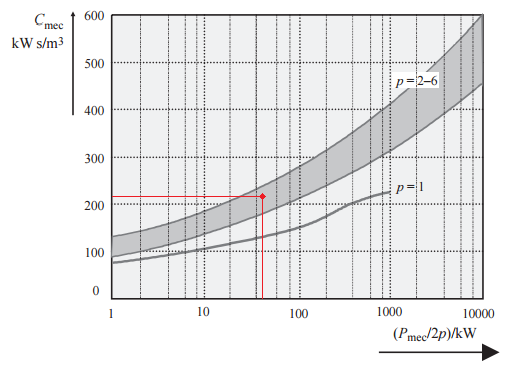

In [57]:
from IPython.display import Image
Image(filename='MachineConstant.png', width=450, height=450)

Cmec is selected as 210 kW S/m3 from the "machine constants of totally enclosed asynchronous and synchronous machines as a function of pole power" figure above.

In [58]:
Cmec=210*1e3 #in kw S/m3

### Step 2: Finding air-gap

An air gap δ of a 50 Hz asynchronous machine can be calculated in metres as a function of
power P with the equation below:

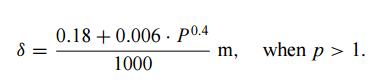

In [59]:
from IPython.display import Image
Image(filename='Formula2.png', width=250, height=250)

In [60]:
δ=(0.18+(0.006*(Prated**(0.4))))/1000
print('Air gap is =', round(δ,5),'in m')

Air gap is = 0.00105 in m


In drives for extremely heavy duty, the air gap is increased by 60%. Therefore;

In [61]:
δ=1.6*δ
print('Air gap is =', round(δ,5),'in m')

Air gap is = 0.00167 in m


However, the smallest technically possible air gap is approximately 0.2 mm according to textbook. Therefore, air gap is chosen as:

In [62]:
δ=0.002
print('Air gap is =', round(δ,3),'in m')

Air gap is = 0.002 in m


### Step 3: Finding rotor and stator dimensions

In order to find X=l/D ratio, table below is utilized. Since the desired machine is an asynchronus machine, formula in red frame:

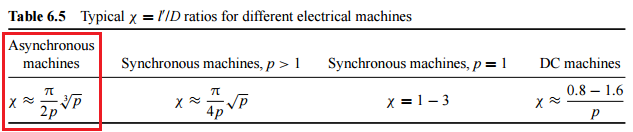

In [63]:
from IPython.display import Image
Image(filename='Table1.png', width=500, height=500)

From the formula above, ratio X can be found:

In [64]:
X=(pi/(2*pp))*(pp**(1./3.))
print ('l/D ratio is =',round(X,2))

l/D ratio is = 0.62


In order to find rotor diameter D and length l, formula below is utilized:

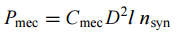

In [65]:
from IPython.display import Image
Image(filename='Formula1.png', width=150, height=150)

In [66]:
nsyn=(2*f)/Npoles
Drotor=(Prated/(Cmec*X*nsyn))**(1./3.) 
l=X*Drotor
print ('Rotor diameter is =',round(Drotor,2),'in m')
print ('Rotor length is =',round(l,2),'in m')

Rotor diameter is = 0.53 in m
Rotor length is = 0.33 in m


Since we both know rotor diameter and airgap length, we can find inner diameter of the stator:

In [67]:
Dstator_in=Drotor+δ
print('Inner stator diameter is =', round(Dstator_in,2))

Inner stator diameter is = 0.54


According to course textbook, the best theoretical diameter ratio (the ratio of the inner diameter of the stator to the outer diameter)is approximately 0.6. Then, we can calculate the stator diameter as below:

In [68]:
Dstator_out=Drotor/0.6
print('Outer stator diameter is =', round(Dstator_out,2),'in m')

Outer stator diameter is = 0.89 in m


### Step 4: Stator winding 

Let's first choose the nuber of stator slots Ns:

In [69]:
m=3 #machine is 3-phase
q=4 #larger q reduces harmonics and losses
Ns=2*pp*q*m
print('Number of stator slots is', Ns)

Number of stator slots is 96.0


According to reference [2], a two layer winding with chorded coils y/τ is chosen as yτ=7/9 to reduce 5th order stator mmf space harmonic, where τ pole pitch in m.

In [70]:
yτ=7/9
τ=(pi*Dstator_in)/(2*pp)#pole pitch
τs=τ/(m*q) #slot pitch
print('Pole pitch is', round(τ,2),'in m')
print('Slot pitch is', round(τs,2),'in m')
      

Pole pitch is 0.21 in m
Slot pitch is 0.02 in m


In [71]:
Kql=sin(pi/6)/(q*sin(pi/(6*q))) #zone factor
Kyl=sin((pi/2)*(yτ)) #chording factor
Kwl=Kql*Kyl #stator winding factor

print('Kql =', round(Kql,2))
print('Kyl =', round(Kyl,2))
print('Kwl =', round(Kwl,2))

Kql = 0.96
Kyl = 0.94
Kwl = 0.9


From Eq. 15.11 in reference [2], airgap flux density Bg is selected as 0.80 T.
The pole spanning coefficient αi is 1 + Kst, where Kst is tooth saturation factor. It is chosen as 1.4.
Therefore we can find pole flux φ based on the Eq 15.10 in reference [2].

In [72]:
Bg=0.80 #airgap flux density
αi=1.4 #pole spanning coefficient
φ=αi*τ*l*Bg #pole flux
KE=0.98-0.005*pp #from Eq. 15.1 in reference [2]
Kf=1.085
Wl=(KE*(Vll/sqrt(3)))/(4*Kf*Kwl*f*φ)
print('Pole flux is', round(φ,2),'in Wb')
print('Number of turns per phase is', round(Wl,2))

Pole flux is 0.08 in Wb
Number of turns per phase is 14.44


Let's choose number of current paths in parallel al=2: Then, number of conductors per slot ns is:

In [73]:
al=2
ns=(al*Wl)/(pp*q)
print('Number of conductors per slot is', round(ns,2))

Number of conductors per slot is 1.8


It is stated in [2] that, ns should be an even number as there are two distinct coils per slot in a double layer winding. Therefore ns can be chosen as 2. Then if we recalcuate Wl and Bg:

In [74]:
ns=2
Wl=pp*q*ns
Bg=0.8*(14.44/Wl)
print('Number of turns per phase is', round(Wl,2))
print('Airgap flux density', round(Bg,2), 'in T')

Number of turns per phase is 32.0
Airgap flux density 0.36 in T


### Step 5: Finding wire diameter

Now, time is to find te wire diameter in stator winding. In order to do this phase current will be calculated.

In [75]:
Iln=Prated/(eff*pf*sqrt(3)*Vll)
print('Rated phase current is', round(Iln,2), 'in A')

Rated phase current is 445.49 in A


In [76]:
Jcos=5 #chosen current density in A/mm2
Aco=Iln/(Jcos*al)
print('Wire cross section', round(Aco,2), 'in mm2')

Wire cross section 44.55 in mm2


Wire gauge diameter dco:

In [77]:
dco=sqrt((4*Aco)/pi)
print('Wire diameter', round(dco,2), 'in mm')

Wire diameter 7.53 in mm


dco>1.3mm, conductors can be used in parallel for in low power induction motors:

In [78]:
ap=42 #number of parallel conductors
dco=sqrt((4*Aco)/(pi*ap))
print('Wire diameter', round(dco,2), 'in mm')

Wire diameter 1.16 in mm


### Step 6: Stator Slot Sizing 

Useful slot area Asu:

In [79]:
Kfill=0.42 #changes 0.4 to 0.44 above 10kW
Asu=(pi*dco*dco*ap*ns)/(4*Kfill)
print('Useful slot area', round(Asu,2), 'in mm2')

Useful slot area 212.14 in mm2


Among the slot shapes, trapezoidal shape is selected. In the figure below, you can see stator slot dimensions.

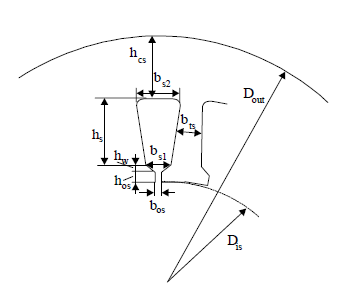

In [80]:
Image(filename='StatorSlotGeometry.png', width=300, height=300)

In [2], dimensions bos, hos and hw are given.

In [81]:
bos=2.5*1e-3 #in m
hos=1e-3 #in m
hw=2*1e-3 #in mm
Kfe=0.96 #for 0.5mm thick lamination
Bts=1.8 #in Tesla
bts=(τs*Bg)/(Bts*Kfe) 
bs1=((pi*(Dstator_in+(2*hos)+(2*hw)))/Ns)-bts
bs2=sqrt(4*(Asu/1e6)*tan(pi/Ns)+(bs1*bs1))
hs=(2*(Asu/1e6))/(bs1+bs2)
print('Tooth width bts ', round(bts,4), 'in m')
print('Slot lower width bs1', round(bs1,4), 'in m')
print('Slot upper width bs2 ', round(bs2,4), 'in m')
print('Slot useful height hs ', round(hs,4), 'in m')

Tooth width bts  0.0037 in m
Slot lower width bs1 0.0141 in m
Slot upper width bs2  0.015 in m
Slot useful height hs  0.0146 in m


Now, let's check whether Fmtr is larger than Fmts. If it is larger, we can go on with design process, if not an iteration with smaller air gap flux density Bg will be needed.

In [82]:
μ0=1.256*1e-6
Fmg=1.2*δ*(Bg/μ0)
print('Airgap mmf is', round(Fmg,2), 'in Aturns')

Airgap mmf is 689.81 in Aturns


In [83]:
Hts=8270 #in A/m according to Table 15.4 in [2]
Fmts=Hts*(hs+hos+hw)
print('Stator tooth mmf is', round(Fmts,2), 'in Aturns')

Stator tooth mmf is 145.26 in Aturns


In [84]:
Kst=1.4-0.97
Fmtr=(Kst*Fmg)-Fmts
print('Rotor tooth mmf is', round(Fmtr,2), 'in Aturns')

Rotor tooth mmf is 151.35 in Aturns


Since Fmtr is slightly larger than Fmts, we can continue to design process.

In [85]:
hcs=(Dstator_out-(Dstator_in+2*(hos+hw+hs)))/2
Bcs=φ/(2*l*hcs)
print('Stator back iron height hcs', round(hcs,2), 'in m')
print('Back core flux density is', round(Bcs,2), 'in T')

Stator back iron height hcs 0.16 in m
Back core flux density is 0.74 in T


Bcs is not within 1.4T to 1.7T. In order to decrease the Bcs, there are two main options. First is to decrease stator diameter. Second, shortening the lenght of the stator. The easy way is the first option, hence Dstator_out is modified to 0.72 m (ex value is 0.89m). If we recalculate hcs and Bcs:

In [86]:
Dstator_out=0.72 #in m
hcs=(Dstator_out-(Dstator_in+2*(hos+hw+hs)))/2
Bcs=φ/(2*l*hcs)
print('New outer stator diameter is =', round(Dstator_out,2),'in m')
print('Stator back iron height hcs', round(hcs,2), 'in m')
print('Back core flux density is', round(Bcs,2), 'in T')

New outer stator diameter is = 0.72 in m
Stator back iron height hcs 0.07 in m
Back core flux density is 1.59 in T


REFERANSLARI EKLE

### Step 7: Rotor slots selection

Relation between stator and rotor slot numbers affects the parasitic torque, additional losses, radial forces, noise and vibration. In [3], common stator/rotor slot combinations are given. Relating to this reference, rotor slot number is selected as 44. 

In [87]:
Nr=72 #number of rotor slots

Next is to determine the slot shape and dimensions. For slot shape; among the choices below, option c is selected.

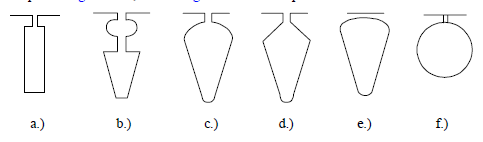

In [88]:
Image(filename='RotorSlotShape.png', width=400, height=400)

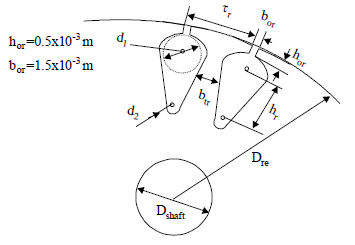

In [89]:
Image(filename='RotorSlotGeometry.png', width=400, height=400)

Before determining the slot dimensions, rotor bar current has to be decided:

In [90]:
KI=0.8*pf+0.2
Ib=(2*KI*m*Wl*Kwl*Iln)/Nr
print('Rotor bar current', round(Ib,2), 'in A')

Rotor bar current 983.53 in A


For high efficiency, the current density in the rotor bar Jb=3.4 A/mm2. Then rotor slot area Ab is:

In [91]:
Jb=3.4*1e6 #in A/m2
Ab=Ib/Jb
print('Rotor slot area is', round(Ab,6), 'in m2')
Ier=Ib/(2*sin((pi*pp)/Nr))
print('End ring current is', round(Ier,2), 'in A')
Jer=0.75*Jb
Aer=Ier/Jer
print('End ring cross section area is', round(Aer,6), 'in m2')
τr=(pi*(Dstator_in-2*δ))/Nr
Dre=Dstator_in-2*δ
print('The rotor slot pitch τr is', round(τr,6), 'in m')

Rotor slot area is 0.000289 in m2
End ring current is 2831.97 in A
End ring cross section area is 0.001111 in m2
The rotor slot pitch τr is 0.023239 in m


In [92]:
Btr=1.8 #in T, rotor tooth flux density
btr=(Bg*τr)/(Kfe*Btr) #tooth width in m
hor=0.5*1e-3 #in m
bor=1.5*1e-3 #in m
print('The tooth width btr is', round(btr,6), 'in m')
dl=(pi*(Dre-2*hor)-(Nr*btr))/(pi+Nr)
print('dl is', round(dl,6), 'in m')

The tooth width btr is 0.004855 in m
dl is 0.017573 in m


From Eq. 15.43 and 15.44 in [2] d2 and hr are found as follows:

In [93]:
d2=0.014 #in m
hr=0.008 #in m

In [94]:
Htr=6160 #in A/m for Btr=1.1T according to Table 15.4 in [2]
Vmtr=Htr*(hr+hor+((dl+d2)/2))
print('Rotor teeth mmf is', round(Vmtr,6), 'in Aturns')

Rotor teeth mmf is 149.606074 in Aturns


This value is close to Fmtr found in Step 6. Therefore, the design is ok for now.

In [95]:
Bcr=1.65 #in Tesla
hcr=φ/(2*l*Bcr)
print('Rotor back core height is', round(hcr,6), 'in m')

Rotor back core height is 0.071517 in m


In [96]:
Dshaft=Dre-2*(hor+(dl+d2)/2+hr+hcr)
print('Max diameter of te shaft is', round(Dshaft,6), 'in m')

Max diameter of te shaft is 0.340984 in m


In [97]:
Ten=Prated/(2*(pi/pp)*f*(1-s))
print('Rated torque is', round(Ten,2), 'in Nm')

Rated torque is 3350.63 in Nm


### Step 8: Magnetization Current 

In order to find the magnetization current, we need to find the total Carter coefficient as below.

In [98]:
γ1=bos**2/(5*δ+bos)
γ2=bor**2/(5*δ+bor)
Kc1=τs/(τs-γ1)
Kc2=τr/(τr-γ2)
Kc=Kc1*Kc2
print('Total Carter coeefficient is', round(Kc,2))

Total Carter coeefficient is 1.04


In [107]:
Ccs=0.88*(exp(-0.4*(Bcs**2)))
Ccr=0.88*(exp(-0.4*(Bcr**2)))
Hcs=2460 #rotor back core flux density in A/m at Bcr=1.59T
Hcr=3460 #rotor back core flux density in A/m at Bcr=1.65T
Fmcs=(Ccs*pi*(Dstator_out-hcs)*Hcs*Bcs)/(2*pp)
Fmcr=(Ccr*pi*(Dshaft-hcr)*Hcr*Bcr)/(2*pp)
Flm=2*(Kc*δ*(Bg/μ0)+Fmts+Fmtr+Fmcs+Fmcr)
Ks=(Flm/(2*Fmg))-1 #total saturation factor
Iμ=(pi*pp*Flm)/(2*3*sqrt(2)*Wl*Kwl) #magnetization current
iμ=Iμ/Iln
print('Rotor tooth mmf is', round(Flm,2), 'in Aturns')
print('Total saturation factor is', round(Ks,2))
print('Magnetization current is', round(Iμ,2), 'in A')
print('p.u. value of Iμ is', round(iμ,2))

Rotor tooth mmf is 2778.97 in Aturns
Total saturation factor is 1.01
Magnetization current is 142.92 in A
p.u. value of Iμ is 0.32


### Step 9: Resistances and Inductances 